# P&D UFSM-CPFL - Energia Incidente
## Cálculo da Resitência Elétrica do Arco
Neste *script* será calculado o valor da **resistência elétrica do arco** com base nas **formas de onda de tensão e corrente da simulação** na plataforma Ansys.

# Bibliotecas

In [208]:
import numpy as np                       # Biblioteca numérica
import matplotlib.pyplot as plt          # Biblioteca gráfica
import csv                               # Biblioteca para manipulação de arquivos CSV
import pandas as pd                      # Biblioteca do pandas para análise de dados
from IPython.display import Markdown     # Biblioteca para importar figuras
from pprint import pprint                # Biblioteca para imprimir como texto

# Circuito Elétrico

<table style="width: 100%; font-size:16px">
    <colgroup>
       <col span="1" style="width: 30%;">
       <col span="1" style="width: 50%;">
    </colgroup>
<tbody>
    <tr>
<td>

<img src="circuit.jpeg" width=400 />
<!-- ![Circuito](circuit.jpeg) -->
        
</td>
<td>

Para o arco entre as barras "a" e "b", tem-se:

$$ I_{arco,ab} = I_{a} $$
$$ V_{arco,ab} = V_{a}-V_{b} $$

Para o arco entre as barras "c" e "b", tem-se:

$$ I_{arco,cb} = I_{c} $$
$$ V_{arco,cb} = V_{c}-V_{b} $$

</td>
</tr>
</tbody>
</table>

# Importação das Formas de Onda

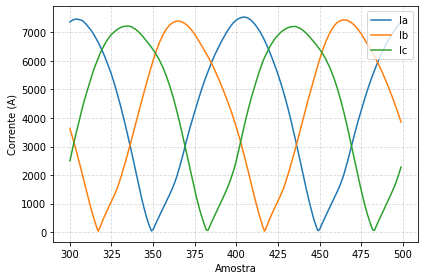

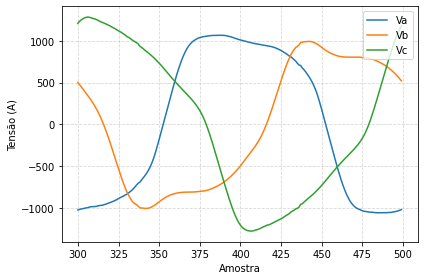

In [209]:
# ------------------------------------#
# Correntes                           #
#-------------------------------------#

# Área da seção transversal do condutor
area = np.pi*(19.05e-3/2)**2                             

# Espefique o intervalo
inicio, fim = 300, 500

# Lê o arquivo current_in.csv como um DataFrame
df_corrente = pd.read_csv('current_in.csv', delimiter=";")  
df_corrente = df_corrente[inicio:fim].copy()
flow_time = df_corrente['flow-time']
time_step_i = df_corrente['Time-Step']                     # Obtém o time-step
Ia = df_corrente['current_in_a'] * area                    # Corrente do eletrodo "a" (A) = Jmag (A/m²) * Area (m²)
Ib = df_corrente['current_in_b'] * area                    # Corrente do eletrodo "a" (A) = Jmag (A/m²) * Area (m²)
Ic = df_corrente['current_in_c'] * area                    # Corrente do eletrodo "a" (A) = Jmag (A/m²) * Area (m²)

Ia1 = Ia
Ib1 = Ib
Ic1 = Ic

# Visualização
plt.plot(Ia, label="Ia")
plt.plot(Ib, label="Ib")
plt.plot(Ic, label="Ic")
plt.legend(loc="upper right")
plt.xlabel('Amostra')
plt.ylabel('Corrente (A)')
plt.grid(b=True, alpha=0.5, ls='dashed')
plt.tight_layout()
plt.show()

# Lê o arquivo tensao.csv como um DataFrame
df_tensao = pd.read_csv('tensao.csv', delimiter=";") 
time_step_v = df_tensao['Time-Step']                                   # Obtém o time-step
Va = df_tensao['tensao-a'][inicio:fim]                                 # Tensão do eletrodo "a" (V)
Vb = df_tensao['tensao-b'][inicio:fim]                                 # Tensão do eletrodo "b" (V)
Vc = df_tensao['tensao-c'][inicio:fim]                                 # Tensão do eletrodo "c" (V)

# Visualização
plt.plot(Va, label="Va")
plt.plot(Vb, label="Vb")
plt.plot(Vc, label="Vc")
plt.legend(loc="upper right")
plt.xlabel('Amostra')
plt.ylabel('Tensão (A)')
plt.grid(b=True, alpha=0.5, ls='dashed')
plt.tight_layout()
plt.show()

# Cálculo da Impedância do Arco

In [210]:
#-------------------------------------#
# Arco entre as barras "a" e "b"      #
#-------------------------------------#
Iarco_ab = np.array(Ia)                         # Corrente do arco (instantânea) (A)
Varco_ab = np.array(Va)-np.array(Vb)            # Tensão do arco (instantânea) (V)

N = len(Varco_ab)                               # Número de pontos

Iarco_ab_rms = np.sqrt( sum(Iarco_ab**2)/N )    # Corrente do arco (eficaz) (A) 
Varco_ab_rms = np.sqrt( sum(Varco_ab**2)/N )    # Tensão do arco (eficaz) (A)

Zarco_ab = Varco_ab_rms/Iarco_ab_rms            # Impedância do arco (Ohm)
print("Zarco,ab = {:.5}".format(Zarco_ab))

#-------------------------------------#
# Arco entre as barras "c" e "b"      #
#-------------------------------------#
Iarco_cb = np.array(Ic)                         # Corrente do arco (instantânea) (A)
Varco_cb = np.array(Vc)-np.array(Vb)            # Tensão do arco (instantânea) (V)

N = len(Varco_cb)                               # Número de pontos
Iarco_cb_rms = np.sqrt( sum(Iarco_cb**2)/N )    # Corrente do arco (eficaz) (A) 
Varco_cb_rms = np.sqrt( sum(Varco_cb**2)/N )    # Tensão do arco (eficaz) (A)

Zarco_cb = Varco_cb_rms/Iarco_cb_rms            # Impedância do arco (Ohm)
print("Zarco,cb = {:.5}".format(Zarco_cb))

Zarco,ab = 0.25424
Zarco,cb = 0.25991


# Cálculo da impedância de curto-circuito

<table style="width: 100%; font-size:16px">
    <colgroup>
       <col span="1" style="width: 30%;">
       <col span="1" style="width: 50%;">
    </colgroup>
<tbody>
    <tr>
<td>
    
<img src="icc.svg" width=400 />
<!-- ![Calculo de Zcc](Icc.svg) -->

</td>
<td>

$$
Z_{cc} = \frac{V_{ca}}{\sqrt{3} I_{cc}}
$$

</td>
</tr>
</tbody>
</table>

In [211]:
Icc = 12.707e3
Voc = 4.16e3

Zcc = Voc/np.sqrt(3)/Icc

print("Zcc = {:.5}".format(Zcc))
# Iarco = Voc/(Zcc + Zarco_ab) 
# Iarco

Zcc = 0.18901


# Solução do Circuito através de Malhas

<table style="width: 100%; font-size:16px">
    <colgroup>
       <col span="1" style="width: 30%;">
       <col span="1" style="width: 50%;">
    </colgroup>
<tbody>
    <tr>
<td>

<img src="malha.svg" width=400 />
<!-- ![Solução do circuito](malha.svg) -->

</td>
<td>

$$\left[ {\begin{array}{c}
  2Z_{cc} + Z_a &  -Z_{cc} \\ 
  -Z_{cc}       &  2Z_{cc} + Z_a
\end{array}} \right] \cdot \left[ {\begin{array}{c}
  {{I_1}} \\ 
  {{I_2}} 
\end{array}} \right] = \left[ {\begin{array}{c}
  V_A - V_B \\ 
  V_B - V_C
\end{array}} \right]
$$

$$
\begin{align*}
  I_A &= I_1 \\
  I_B &= I_2 - I_1 \\
  I_C &= -I_2
\end{align*}
$$

</td>
</tr>
</tbody>
</table>

In [212]:
# Definição do alpha para realizar as defasagens
phi = 2*np.pi/3
alpha = np.array([complex(1*np.cos(0),    1*np.sin(0)   ),
                  complex(1*np.cos(-phi), 1*np.sin(-phi)),
                  complex(1*np.cos(phi),  1*np.sin(phi) )])

# Obtém as tensões de fase
Va = Voc/np.sqrt(3) * alpha[0]
Vb = Voc/np.sqrt(3) * alpha[1]
Vc = Voc/np.sqrt(3) * alpha[2]

print("\nTensões de fase")
print(f"Va = {Va:.4f}   \t  {np.abs(Va):.4f} |_ {np.angle(Va, True):.2f}")
print(f"Vb = {Vb:.4f}   \t  {np.abs(Vb):.4f} |_ {np.angle(Vb, True):.2f}")
print(f"Vc = {Vc:.4f}   \t  {np.abs(Vc):.4f} |_ {np.angle(Vc, True):.2f}")

# Solução do Sistema Linear Ax=B
A = np.array([[2*Zcc + Zarco_ab,    -Zcc            ], 
              [-Zcc,                2*Zcc + Zarco_cb]])
B = np.array([Va - Vb, 
              Vb- Vc])
correntes = np.linalg.solve(A, B)

print("\nCorrentes de Malha")
print(f"I1 = {correntes[0]:.4f}     \t  {np.abs(correntes[0]):.4f} |_ {np.angle(correntes[0], True):.2f}°")
print(f"I2 = {correntes[1]:.4f}     \t  {np.abs(correntes[1]):.4f} |_ {np.angle(correntes[1], True):.2f}°")

# Obtenção das correntes de Fase a partir das correntes de malha
Ia = correntes[0]
Ib = correntes[1] - correntes[0]
Ic = -correntes[1]

print("\nCorrentes de fase")
print(f"Ia = {Ia:.4f}     \t  {np.abs(Ia):.4f} |_ {np.angle(Ia, True):.2f}°") 
print(f"Ib = {Ib:.4f}     \t  {np.abs(Ib):.4f} |_ {np.angle(Ib, True):.2f}°")
print(f"Ic = {Ic:.4f}     \t  {np.abs(Ic):.4f} |_ {np.angle(Ic, True):.2f}°")


Tensões de fase
Va = 2401.7771+0.0000j   	  2401.7771 |_ 0.00
Vb = -1200.8886-2080.0000j   	  2401.7771 |_ -120.00
Vc = -1200.8886+2080.0000j   	  2401.7771 |_ 120.00

Correntes de Malha
I1 = 6251.8191+1470.6046j     	  6422.4544 |_ 13.24°
I2 = 1852.3286-6085.2963j     	  6360.9710 |_ -73.07°

Correntes de fase
Ia = 6251.8191+1470.6046j     	  6422.4544 |_ 13.24°
Ib = -4399.4905-7555.9009j     	  8743.4064 |_ -120.21°
Ic = -1852.3286+6085.2963j     	  6360.9710 |_ 106.93°


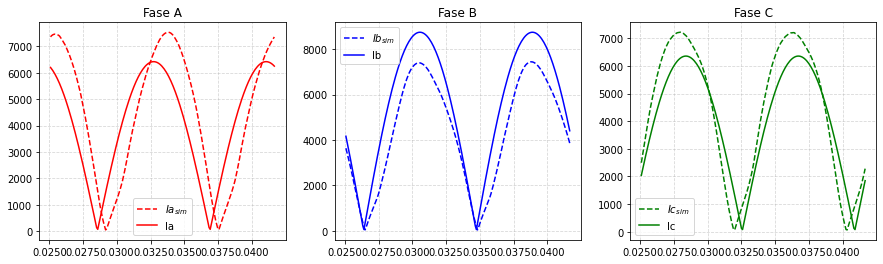

In [213]:
f = 60
T = 3/f
w = 2*np.pi*f
passo = 8.333e-5
t = np.arange(passo, T, passo)[inicio:fim]
# t = flow_time

Ia_onda = np.abs(Ia)*np.cos(w*t + np.angle(Ia))
Ib_onda = np.abs(Ib)*np.cos(w*t + np.angle(Ib))
Ic_onda = np.abs(Ic)*np.cos(w*t + np.angle(Ic))

fig, ax = plt.subplots(1, 3, figsize=(15, 4))

ax[0].set_title("Fase A")
ax[1].set_title("Fase B")
ax[2].set_title("Fase C")

ax[0].plot(t, Ia1, label="$Ia_{sim}$", linestyle="--", color='red')
ax[1].plot(t, Ib1, label="$Ib_{sim}$", linestyle="--", color='blue')
ax[2].plot(t, Ic1, label="$Ic_{sim}$", linestyle="--", color='green')

ax[0].plot(t, abs(Ia_onda), label="Ia", color='red')
ax[1].plot(t, abs(Ib_onda), label="Ib", color='blue')
ax[2].plot(t, abs(Ic_onda), label="Ic", color='green')

for ax_i in ax:
    ax_i.legend()
    ax_i.grid(b=True, alpha=0.5, ls='dashed')
plt.show()